Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1) Load your zillow dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as w
import evaluate as ev

In [2]:
#Wrangling and splitting data

train, validate, test = w.wrangle_zillow()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242210 entries, 211116 to 1113816
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedrooms        1242210 non-null  int64  
 1   bathrooms       1242210 non-null  float64
 2   sqft            1242210 non-null  int64  
 3   value           1242210 non-null  int64  
 4   yearbuilt       1242210 non-null  int64  
 5   taxamount       1242210 non-null  int64  
 6   county          1242210 non-null  object 
 7   county_Orange   1242210 non-null  uint8  
 8   county_Ventura  1242210 non-null  uint8  
dtypes: float64(1), int64(5), object(1), uint8(2)
memory usage: 78.2+ MB


2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```

Modify and add to the code above as necessary for it to work with the zillow dataset.

In [4]:
from sklearn.linear_model import LinearRegression

X = train[['sqft']]
y = train.value

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [5]:
predictions[:5] #Checking to see if predictions were actually produced

array([739341.04035424, 363970.80912006, 656641.07863415, 240049.68267968,
       377625.31993366])

3) Plot the residuals for the linear regression model that you made.

In [6]:
#Creating a new column for my predictions

train['predictions'] = predictions

In [7]:
#Another new column for my residuals

train['residuals'] = train.predictions - train.value

In [8]:
#Checking head to make sure they're there

train.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county,county_Orange,county_Ventura,predictions,residuals
211116,4,3.0,3073,367514,1980,4691,LA,0,0,739341.040354,371827.040354
1901038,3,3.0,1616,351442,1949,4529,LA,0,0,363970.809120,12528.809120
1892331,6,3.0,2752,636202,1965,7256,Orange,1,0,656641.078634,20439.078634
1961460,2,2.0,1135,184000,1985,3176,LA,0,0,240049.682680,56049.682680
1608216,3,2.0,1669,534783,1923,6653,LA,0,0,377625.319934,-157157.680066


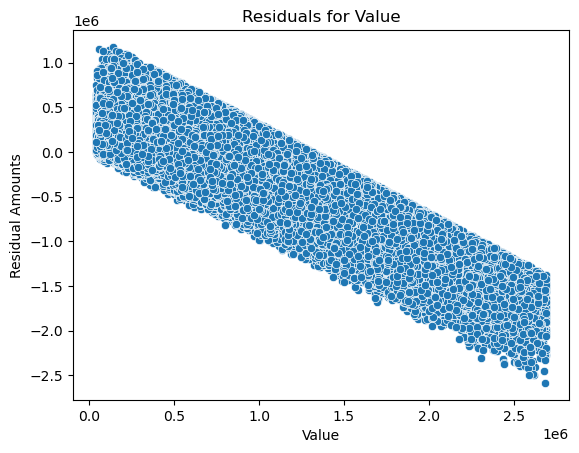

In [9]:
#Commence the plotting

sns.scatterplot(data=train, x='value', y='residuals')
plt.xlabel('Value')
plt.ylabel('Residual Amounts')
plt.title('Residuals for Value')
plt.show()

4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
#SSE for model

SSE_model = (train.residuals ** 2).sum()
print(f'SSE for model = {SSE_model}')

SSE for model = 9.720635880094776e+16


In [11]:
#ESS for model

ESS_model = sum((train.predictions - train.value.mean())**2)
print(f'ESS for model = {ESS_model}')

ESS for model = 4.8343016451367736e+16


In [12]:
#TSS for model

TSS_model = ESS_model + SSE_model
print(f'TSS for model = {TSS_model}')

TSS for model = 1.455493752523155e+17


In [13]:
#MSE for model

MSE_model = SSE_model / len(train)
print(f'MSE for model = {MSE_model}')

MSE for model = 78252758230.04787


In [14]:
#RMSE for model

RMSE_model = MSE_model ** 0.5
print(f'RMSE for model = {RMSE_model}')

RMSE for model = 279736.94469992316


5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [15]:
#Set the baseline

baseline = train.value.mean()
train['baseline'] = baseline

In [16]:
#Check

train.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county,county_Orange,county_Ventura,predictions,residuals,baseline
211116,4,3.0,3073,367514,1980,4691,LA,0,0,739341.040354,371827.040354,413868.349411
1901038,3,3.0,1616,351442,1949,4529,LA,0,0,363970.809120,12528.809120,413868.349411
1892331,6,3.0,2752,636202,1965,7256,Orange,1,0,656641.078634,20439.078634,413868.349411
1961460,2,2.0,1135,184000,1985,3176,LA,0,0,240049.682680,56049.682680,413868.349411
1608216,3,2.0,1669,534783,1923,6653,LA,0,0,377625.319934,-157157.680066,413868.349411


In [17]:
#SSE for baseline

train['baseline_residuals'] = train.baseline - train.value

SSE_baseline = (train.baseline_residuals ** 2).sum()
print(f'SSE for baseline = {SSE_baseline}')

SSE for baseline = 1.4554937525231146e+17


In [18]:
#MSE for baseline

MSE_baseline = SSE_baseline / len(train)
print(f'MSE for baseline = {MSE_baseline}')

MSE for baseline = 117169701783.36308


In [19]:
#RMSE for baseline

RMSE_baseline = MSE_baseline ** 0.5
print(f'RMSE for baseline = {RMSE_baseline}')

RMSE for baseline = 342300.6014943051


6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
print(f'The SSE for the model is: {SSE_model}')
print(f'The SSE for the baseline is: {SSE_baseline}')
if SSE_model < SSE_baseline:
    print('The model outperforms the baseline.')
else:
    print('The model did not perform better than the baseline.')

The SSE for the model is: 9.720635880094776e+16
The SSE for the baseline is: 1.4554937525231146e+17
The model outperforms the baseline.


7) What is the amount of variance explained in your model?

Going to find the amount of variance using several different methods.

In [21]:
#Semi-manual calculation

ESS_model / TSS_model

0.33214169670988447

In [22]:
#Using r2_score function

from sklearn.metrics import r2_score

r2_score(train.value, train.predictions)

0.33214169670986593

In [23]:
#Using explained_variance_score function

from sklearn.metrics import explained_variance_score

explained_variance_score(train.value, train.predictions)

0.33214169670986593

Happy to see they all have the same result.

8) Is your model better than the baseline model?

Yes, oBvIoUsLy.

9) Create a file named ```evaluate.py``` that contains the following functions.

- ```plot_residuals(y, yhat)```: creates a residual plot
- ```regression_errors(y, yhat)```: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
- ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false

Functions were created in evaluate.py file. Notebook has been restarted and evaluate file has been imported at the top and run through in the following cells for testing.

In [24]:
y = train.value
yhat = train.predictions

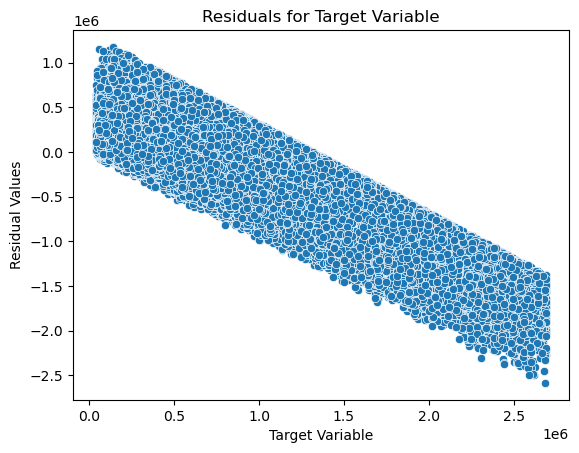

In [25]:
ev.plot_residuals(y, yhat)

In [26]:
ev.regression_errors(y, yhat)

SSE for model = 9.720635880094776e+16
ESS for model = 4.8343016451367736e+16
TSS for model = 1.455493752523155e+17
MSE for model = 78252758230.04787
RMSE for model = 279736.94469992316


In [27]:
ev.baseline_mean_errors(y)

SSE for baseline = 1.4554937525231146e+17
MSE for baseline = 117169701783.36308
RMSE for baseline = 342300.6014943051


In [28]:
ev.better_than_baseline(y, yhat)

The SSE for the model is: 9.720635880094776e+16
The SSE for the baseline is: 1.4554937525231146e+17
The model outperforms the baseline.


True

# Bonus Questions

1) Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [32]:
from pydataset import data

tips = data('tips')

In [37]:
tips_train, tips_validate, tips_test = w.split_data(tips)

In [39]:
tips_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 225 to 167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  146 non-null    float64
 1   tip         146 non-null    float64
 2   sex         146 non-null    object 
 3   smoker      146 non-null    object 
 4   day         146 non-null    object 
 5   time        146 non-null    object 
 6   size        146 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.1+ KB


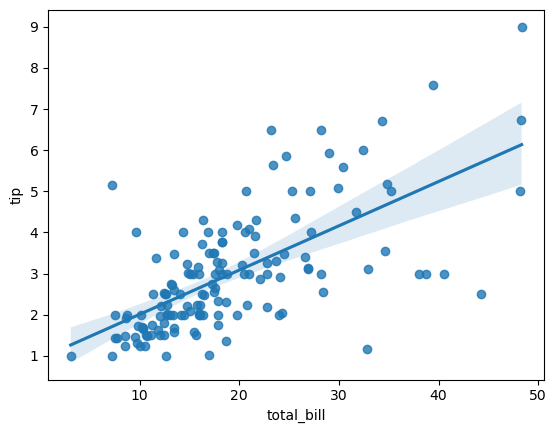

In [40]:
sns.regplot(data=tips_train, x='total_bill', y='tip')
plt.show()

<AxesSubplot:xlabel='tip', ylabel='Count'>

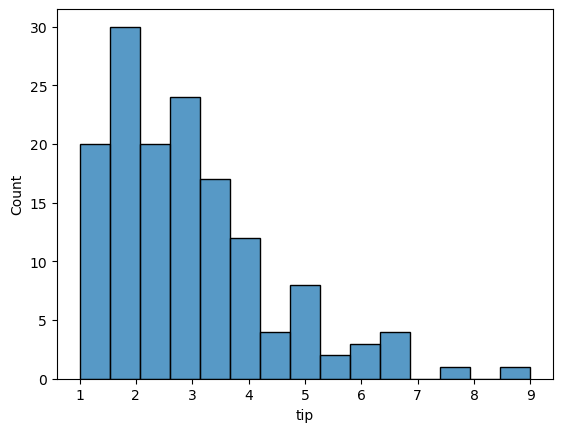

In [43]:
sns.histplot(tips_train.tip)

In [45]:
import scipy.stats as stats

r, p = stats.spearmanr(tips.total_bill, tips.tip)

r, p

(0.6789681219001009, 2.501158440923619e-34)

Correlation value of 0.67.

In [47]:
tip_lr = LinearRegression()
tip_lr.fit(tips[['total_bill']], tips.tip)

LinearRegression()

In [50]:
tips['predictions'] = tip_lr.predict(tips[['total_bill']])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,predictions
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


In [51]:
ev.regression_errors(tips.tip, tips.predictions)

SSE for model = 252.788743850776
ESS for model = 212.4237331984042
TSS for model = 465.21247704918017
MSE for model = 1.036019442011377
RMSE for model = 1.0178504025697377


In [53]:
ev.baseline_mean_errors(tips.tip)

SSE for baseline = 465.2124770491804
MSE for baseline = 1.906608512496641
RMSE for baseline = 1.3807999538298954


In [54]:
ev.better_than_baseline(tips.tip, tips.predictions)

The SSE for the model is: 252.788743850776
The SSE for the baseline is: 465.2124770491804
The model outperforms the baseline.


True

In [56]:
tips.sort_values('tip')

,total_bill,tip,sex,smoker,day,time,size,predictions
68,3.07,1.00,Female,Yes,Sat,Dinner,1,1.242695
237,12.60,1.00,Male,Yes,Sat,Dinner,2,2.243579
93,5.75,1.00,Female,Yes,Fri,Dinner,2,1.524161
112,7.25,1.00,Female,No,Sat,Dinner,1,1.681697
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
...,...,...,...,...,...,...,...,...
142,34.30,6.70,Male,No,Thur,Lunch,6,4.522611
60,48.27,6.73,Male,No,Sat,Dinner,4,5.989803
24,39.42,7.58,Male,No,Sat,Dinner,4,5.060336
213,48.33,9.00,Male,No,Sat,Dinner,4,5.996105


In [ ]:
rfe()